In [305]:
pip install opencv-python

In [306]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [307]:
image  = plt.imread("SanjaySingh.jpg")

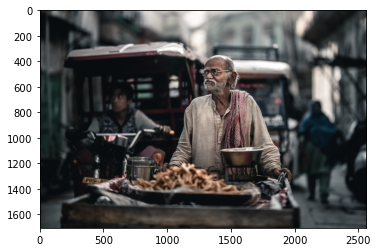

In [308]:
plt.imshow(image)

In [309]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

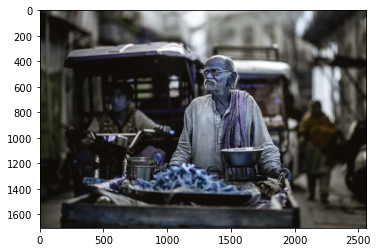

In [310]:
plt.imshow(new_image)

In [311]:
yolo = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [312]:
classes = []

with open("./coco.names", "r") as f:
    classes = f.read().splitlines()

In [313]:
len(classes)

80

In [314]:
img = cv2.imread("SanjaySingh.jpg")
height, width, _ = img.shape

In [315]:
blob = cv2.dnn.blobFromImage(img, 1/255, (320, 320), swapRB=True, crop=False)

In [316]:
blob.shape

(1, 3, 320, 320)

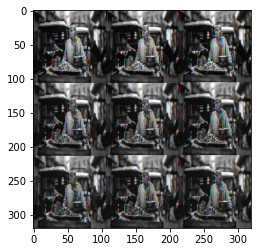

In [317]:
i = blob[0].reshape(320, 320, 3) 
plt.imshow(i)

In [318]:

yolo.setInput(blob)

In [319]:
output_layer_name = yolo.getUnconnectedOutLayersNames()
layer_output = yolo.forward(output_layer_name)
height, width, _ = img.shape

In [320]:
boxes = []
confidences = []
class_ids = []

for output in layer_output:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.4:
            center_x = int(detection[0]* width)
            center_y = int(detection[1]* height)
            w = int(detection[2]* width)
            h = int(detection[3]* height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)



In [321]:
len(boxes)

13

In [322]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.4, 0.5)

In [323]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3))

In [324]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]

    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]

    cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
    cv2.putText(img, label +" "+confi, (x,y), font, 2, (255,255,255), 2)

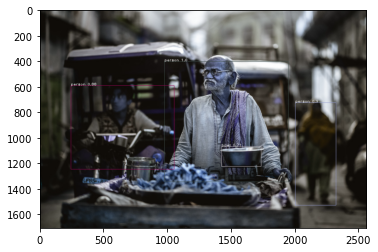

In [325]:
plt.imshow(img)

In [326]:
# To save a current image
cv2.imwrite("./img2.jpg", img)

True